11:34:37 - cmdstanpy - INFO - Chain [1] start processing
11:34:52 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\MSCS\Downloads\AI_AWS\.venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\MSCS\Downloads\AI_AWS\.venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


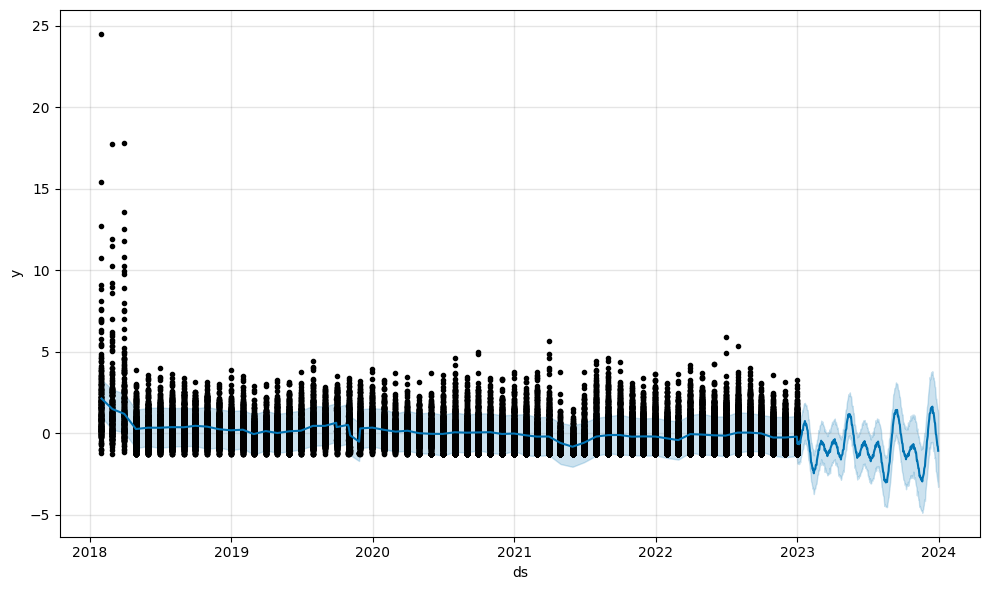

In [8]:
import pandas as pd
from prophet import Prophet
from sklearn.preprocessing import StandardScaler
import pickle


df = pd.read_csv('file.csv')
df['AsOnDt'] = pd.to_datetime(df['AsOnDt'])
df['AsOnDt'] = df['AsOnDt'].dt.strftime('%Y-%m-%d %H:%M')
typeofprocess = input("Input data generalized or district Wise: ")

if typeofprocess == "General":
    attri = input("Enter Criteria for prediction: ")
else:
    dist = input("Enter district to filter search: ")
    df = df[df['District_Eng'].str.contains(dist, case=False)]
    attri = input("Enter Criteria for prediction: ")

scaler = StandardScaler()
columns_to_normalize = [attri]
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

dfvar = df[[attri, 'AsOnDt']]
dfvar = dfvar.rename(columns={'AsOnDt': 'ds', attri: 'y'})

m = Prophet()
m.fit(dfvar)
future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
fig1 = m.plot(forecast)

with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(m, f)

with open('forecast.pkl', 'wb') as f:
    pickle.dump(forecast, f)

with open('fig1.pkl', 'wb') as f:
    pickle.dump(fig1, f)

with open('data.pkl', 'wb') as f:
    pickle.dump(df, f)


In [9]:
df['District_Eng'].unique()

array(['Jamnagar', 'Banaskantha', 'Rajkot', 'Kachchh', 'Amreli', 'Morbi',
       'Devbhumi-Dwarka', 'Vadodara', 'Sabarkantha', 'Junagadh',
       'Navsari', 'Tapi', 'Anand', 'Chhotaudepur', 'Surat', 'Bhavnagar',
       'Kheda', 'Panchmahals', 'The Dangs', 'Surendranagar', 'Ahmedabad',
       'Patan', 'Gir Somnath', 'Mahisagar', 'Bharuch', 'Valsad', 'Botad',
       'Mahesana', 'Porbandar', 'Aravalli', 'Narmada', 'Gandhinagar',
       'Dahod'], dtype=object)

In [3]:
!python -m pip install prophet

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/162.2 kB ? eta -:--:--
     -------------------------------------- 162.2/162.2 kB 4.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB 9.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/13.3 MB 8.9 MB/s eta 0:00:02
   --- ------------------------------------ 1.2/13.3 MB 9.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.8/13.3 MB 9.5 MB/s eta 0:00:02
   ------- -------------------------------- 2.6/13.3 MB 10.9 MB/s eta 0:00:01
   ---------- ----------------------------- 3.5/13.3 MB 12.4 MB/s eta 0:00:01
   ------------ --------------------------- 4.3/13.3 MB 13.1 MB/s eta 0:00:01
   ---------------- ----------------------- 5.4/13.3 MB 15.1 MB/s eta 0:00:01
   --

In [4]:
!python -m pip install --upgrade plotly

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
    --------------------------------------- 0.3/15.6 MB 8.6 MB/s eta 0:00:02
   -- ------------------------------------- 1.1/15.6 MB 14.6 MB/s eta 0:00:01
   ----- ---------------------------------- 2.3/15.6 MB 18.5 MB/s eta 0:00:01
   -------- ------------------------------- 3.5/15.6 MB 18.7 MB/s eta 0:00:01
   ----------- ---------------------------- 4.4/15.6 MB 20.0 MB/s eta 0:00:01
   ------------- -------------------------- 5.5/15.6 MB 20.6 MB/s eta 0:00:01
   ---------------- ----------------------- 6.5/15.6 MB 21.7 MB/s eta 0:00:01
   ------------------- -------------------- 7.5/15.6 MB 21.7 MB/s eta 0:00:01
   --------------------- ------------------ 8.6/15.6 MB 22.0 MB/s eta 0:00:01
   ------------------------- -------------- 9.8/15.6 MB 22.4 MB/s eta 0:00:01
   --------------------------- ------------ 10.8/15.6 MB 23.4 MB/s eta 0:00:01
   ------------------------------ --------- 11.8/15.6 MB 23.4 MB/s eta 0

In [5]:
!python -m pip install pandas

In [6]:
!python -m pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 871.5 kB/s eta 0:00:01
     ---------------------------------------- 60.4/60.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   -- ------------------------------------- 0.7/10.6 MB 15.8 MB/s eta 0:00:01
   ----- ---------------------------------- 1.6/10.6 MB 19.8 MB/s eta 0:00:01
   --------- ------------------------------ 2.6/10.6 MB 21.0 MB/s eta 0:00:01
   -------------- ------------------------- 3.8/10.6 MB 20.2 MB/s eta 0:00:01
   ----------------- ---------------------- 4.6/10.6 MB 20.9 MB/s eta 0:00:01
   -------------------- ------------------- 5.3/10.6 MB 20.1 MB/s eta 0:00:01
   ------------------------ --------------- 6.4/10.6 MB 20.5 MB/s eta 0:00:01
   ---------------------------- ----------- 7.6/10.6 MB 21.1 MB/s eta 0:00:01
 